In [ ]:
pip install pandas matplotlib scikit-learn

In [ ]:
import pandas as pd

data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance_Percentage': [60, 65, 70, 75, 78, 82, 85, 90, 92, 95],
    'Final_Score': [45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
}

df = pd.DataFrame(data)
df.to_csv('student_scores.csv', index=False)


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv('student_scores.csv')
print(df.head())

# Explore
print(df.describe())
print(df.info())


   Hours_Studied  Attendance_Percentage  Final_Score
0              1                     60           45
1              2                     65           50
2              3                     70           55
3              4                     75           60
4              5                     78           65
       Hours_Studied  Attendance_Percentage  Final_Score
count       10.00000              10.000000    10.000000
mean         5.50000              79.200000    67.500000
std          3.02765              11.764353    15.138252
min          1.00000              60.000000    45.000000
25%          3.25000              71.250000    56.250000
50%          5.50000              80.000000    67.500000
75%          7.75000              88.750000    78.750000
max         10.00000              95.000000    90.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------       

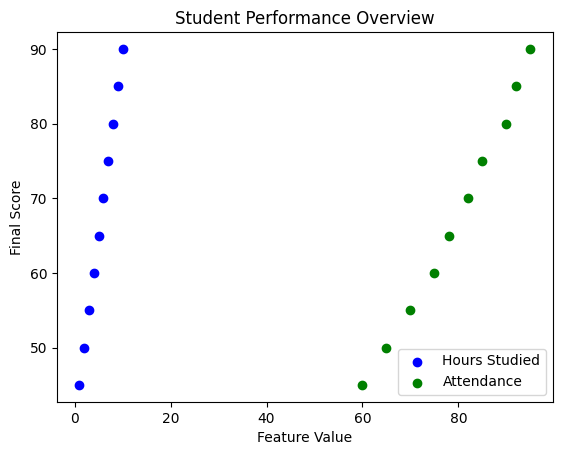

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours_Studied'], df['Final_Score'], color='blue', label='Hours Studied')
plt.scatter(df['Attendance_Percentage'], df['Final_Score'], color='green', label='Attendance')
plt.xlabel('Feature Value')
plt.ylabel('Final Score')
plt.legend()
plt.title('Student Performance Overview')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df[['Hours_Studied', 'Attendance_Percentage']]
y = df['Final_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.0
R2 Score: 1.0


In [ ]:
# Predict for a new student
custom_input = [[7, 85]]  # 7 hours studied, 85% attendance
prediction = model.predict(custom_input)
print("Predicted Final Score:", prediction[0])


Predicted Final Score: 75.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


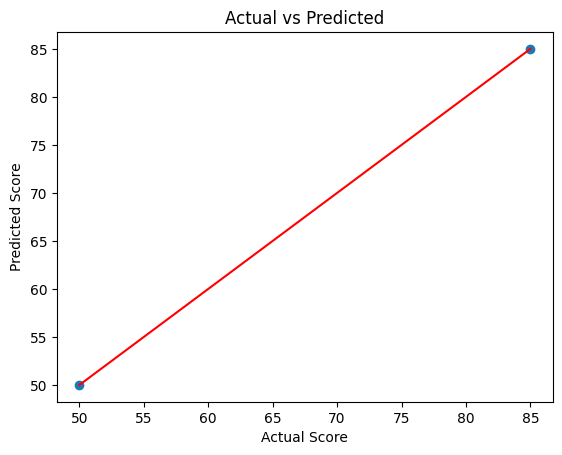

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


In [ ]:
df = df.sample(frac=1, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", scores)
print("Average R2 score:", scores.mean())


Cross-validated R2 scores: [1. 1. 1. 1. 1.]
Average R2 score: 1.0


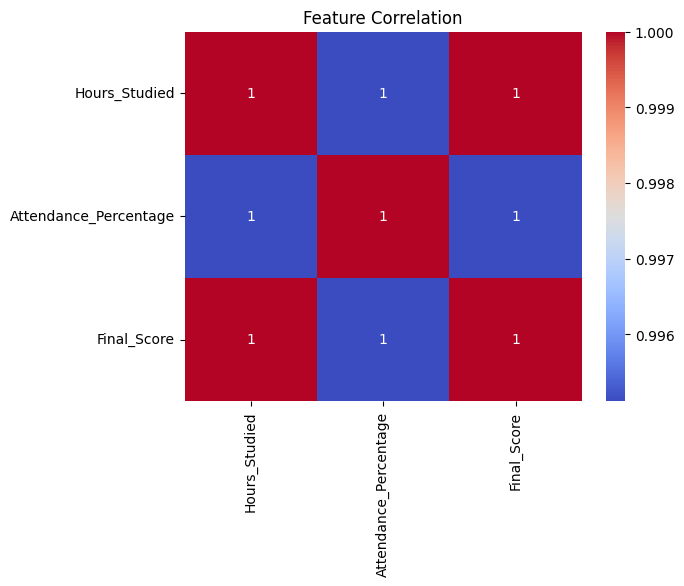

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())


Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
Average R2 Score: 1.0


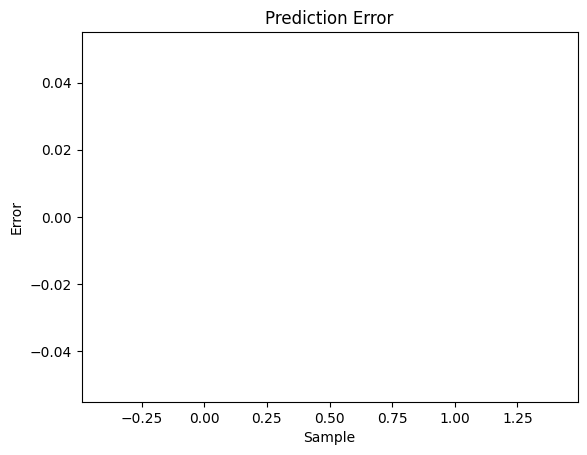

In [ ]:
import numpy as np
plt.bar(np.arange(len(y_test)), y_test - y_pred)
plt.title("Prediction Error")
plt.ylabel("Error")
plt.xlabel("Sample")
plt.show()


MSE: 0.0
R² Score: 1.0
Predicted Final Score: 75.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


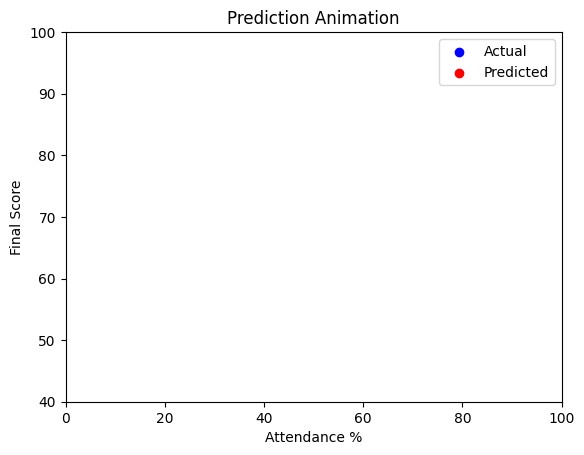

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance_Percentage': [60, 65, 70, 75, 78, 82, 85, 90, 92, 95],
    'Final_Score': [45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
}
df = pd.DataFrame(data)

# 2. Train/Test Split
X = df[['Hours_Studied', 'Attendance_Percentage']]
y = df['Final_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
custom_input = [[7, 85]]
print("Predicted Final Score:", model.predict(custom_input)[0])

# 5. Animate predictions vs actual
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(40, 100)
sc_actual = ax.scatter([], [], color='blue', label='Actual')
sc_pred = ax.scatter([], [], color='red', label='Predicted')
plt.xlabel("Attendance %")
plt.ylabel("Final Score")
plt.title("Prediction Animation")
plt.legend()

# Prepare data
actual_x = list(X_test['Attendance_Percentage'])
actual_y = list(y_test)
predicted_y = list(y_pred)

def update(frame):
    sc_actual.set_offsets([[actual_x[frame], actual_y[frame]]])
    sc_pred.set_offsets([[actual_x[frame], predicted_y[frame]]])
    return sc_actual, sc_pred

ani = FuncAnimation(fig, update, frames=len(actual_x), interval=1000, repeat=False)
plt.show()



In [ ]:
from IPython.display import HTML

ani = FuncAnimation(fig, update, frames=len(actual_x), interval=1000, repeat=False)
HTML(ani.to_jshtml())  # Use JS-based animation for Colab


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
